In [1]:
cd /content/drive/app/task-gen/

/content/drive/app/task-gen


# Preprocess

In [0]:
%matplotlib inline

import random
import seaborn as sns

from tqdm import tqdm
from itertools import chain
from utils import hyperdash
from string import ascii_lowercase
from langdetect import detect as detect_lang, detect_langs

## Args

In [0]:
TOPLEVELFUNCS_DESC_PATH = 'code-docstring-corpus/V2/parallel/parallel_desc'
METHODS_DESC_PATH = 'code-docstring-corpus/V2/parallel/parallel_methods_desc'
DESC_PATHS = [
    TOPLEVELFUNCS_DESC_PATH,
    METHODS_DESC_PATH
]
MAX_READ = 1000000

## Read

In [0]:
def read_desc_gen(file_path):
    with open(file_path, 'r', errors='ignore') as f:
        for line in f:
            yield line.strip()[1:-1]
            
            
def read_all():
    all_gen = (read_desc_gen(desc_path) for desc_path in DESC_PATHS)
    return list(set(chain.from_iterable(all_gen)))

In [5]:
%time descs = read_all()[:MAX_READ]
len(descs)

CPU times: user 658 ms, sys: 90 ms, total: 748 ms
Wall time: 5.2 s


357220

## Filtering

In [0]:
LEN_LB, LEN_UP = 25, 500
LOG_STEP = 10000
CHARS_TRESHOLD = 0.8

In [0]:
def is_english_detect(text):
    try:
        return detect_lang(text) == 'en'
    except:
        return False


def is_chinise(text):
    for c in text:
        if 0x4e00 <= ord(c) <= 0x9fff:
            return True
    return False


def is_ascii(text):
    return all(31 < ord(c) < 128 for c in text)

    
def is_plausible_chars(text):
    m = sum(bool(c in ascii_lowercase) for c in text.lower()) 
    n = len(text)
    return m / n >= CHARS_TRESHOLD and is_ascii(text)


def is_sensible(text):
    return is_english_detect(text) and is_plausible_chars(text)


def is_valid(desc):
    return LEN_LB <= len(desc) <= LEN_UP and is_sensible(desc)

In [0]:
@hyperdash('[1.1.1] Preprocessing english sorting')
def english_sorting(descs, *, exp):
    new_descs = []
    for i, desc in enumerate(tqdm(descs)):
        if is_valid(desc):
            new_descs.append(desc)
        if i % LOG_STEP == 0 or i == len(descs) - 1:
            exp.metric('step', i)
            exp.metric('current len', len(new_descs))
    return new_descs

In [9]:
%time descs = english_sorting(descs)
len(descs)

  0%|          | 0/357220 [00:00<?, ?it/s]

| step:   0.000000 |
| current len:   0.000000 |


  3%|▎         | 9999/357220 [01:02<36:10, 159.98it/s]

| step: 10000.000000 |
| current len: 4794.000000 |


  6%|▌         | 19996/357220 [02:03<34:50, 161.31it/s]

| step: 20000.000000 |
| current len: 9595.000000 |


  8%|▊         | 29993/357220 [03:05<33:45, 161.55it/s]

| step: 30000.000000 |
| current len: 14377.000000 |


 11%|█         | 39990/357220 [04:07<32:41, 161.75it/s]

| step: 40000.000000 |
| current len: 19151.000000 |


 14%|█▍        | 49998/357220 [05:08<31:38, 161.82it/s]

| step: 50000.000000 |
| current len: 23979.000000 |


 17%|█▋        | 59986/357220 [06:10<30:35, 161.93it/s]

| step: 60000.000000 |
| current len: 28896.000000 |


 20%|█▉        | 69996/357220 [07:12<29:33, 161.91it/s]

| step: 70000.000000 |
| current len: 33716.000000 |


 22%|██▏       | 79990/357220 [08:12<28:27, 162.34it/s]

| step: 80000.000000 |
| current len: 38512.000000 |


 25%|██▌       | 89998/357220 [09:14<27:25, 162.35it/s]

| step: 90000.000000 |
| current len: 43315.000000 |


 28%|██▊       | 99996/357220 [10:15<26:23, 162.42it/s]

| step: 100000.000000 |
| current len: 48047.000000 |


 31%|███       | 109990/357220 [11:17<25:23, 162.32it/s]

| step: 110000.000000 |
| current len: 52823.000000 |


 34%|███▎      | 119987/357220 [12:18<24:19, 162.51it/s]

| step: 120000.000000 |
| current len: 57604.000000 |


 36%|███▋      | 129982/357220 [13:19<23:17, 162.62it/s]

| step: 130000.000000 |
| current len: 62409.000000 |


 39%|███▉      | 139983/357220 [14:20<22:14, 162.76it/s]

| step: 140000.000000 |
| current len: 67151.000000 |


 42%|████▏     | 149992/357220 [15:20<21:11, 162.94it/s]

| step: 150000.000000 |
| current len: 71928.000000 |


 45%|████▍     | 159989/357220 [16:21<20:10, 162.98it/s]

| step: 160000.000000 |
| current len: 76713.000000 |


 48%|████▊     | 170000/357220 [17:22<19:07, 163.11it/s]

| step: 170000.000000 |
| current len: 81377.000000 |


 50%|█████     | 179989/357220 [18:22<18:06, 163.19it/s]

| step: 180000.000000 |
| current len: 86227.000000 |


 53%|█████▎    | 189984/357220 [19:24<17:04, 163.18it/s]

| step: 190000.000000 |
| current len: 90993.000000 |


 56%|█████▌    | 199999/357220 [20:25<16:03, 163.22it/s]

| step: 200000.000000 |
| current len: 95754.000000 |


 59%|█████▉    | 209996/357220 [21:26<15:02, 163.22it/s]

| step: 210000.000000 |
| current len: 100488.000000 |


 62%|██████▏   | 219988/357220 [22:27<14:00, 163.23it/s]

| step: 220000.000000 |
| current len: 105277.000000 |


 64%|██████▍   | 229992/357220 [23:28<12:59, 163.30it/s]

| step: 230000.000000 |
| current len: 110087.000000 |


 67%|██████▋   | 239991/357220 [24:30<11:58, 163.23it/s]

| step: 240000.000000 |
| current len: 114880.000000 |


 70%|██████▉   | 250000/357220 [25:31<10:57, 163.19it/s]

| step: 250000.000000 |
| current len: 119722.000000 |


 73%|███████▎  | 259998/357220 [26:32<09:55, 163.23it/s]

| step: 260000.000000 |
| current len: 124538.000000 |


 76%|███████▌  | 269995/357220 [27:33<08:54, 163.31it/s]

| step: 270000.000000 |
| current len: 129299.000000 |


 78%|███████▊  | 279995/357220 [28:34<07:52, 163.30it/s]

| step: 280000.000000 |
| current len: 134141.000000 |


 81%|████████  | 289996/357220 [29:36<06:51, 163.27it/s]

| step: 290000.000000 |
| current len: 138966.000000 |


 84%|████████▍ | 299999/357220 [30:36<05:50, 163.33it/s]

| step: 300000.000000 |
| current len: 143680.000000 |


 87%|████████▋ | 309985/357220 [31:37<04:49, 163.34it/s]

| step: 310000.000000 |
| current len: 148492.000000 |


 90%|████████▉ | 319986/357220 [32:37<03:47, 163.43it/s]

| step: 320000.000000 |
| current len: 153221.000000 |


 92%|█████████▏| 329996/357220 [33:39<02:46, 163.43it/s]

| step: 330000.000000 |
| current len: 157937.000000 |


 95%|█████████▌| 339994/357220 [34:39<01:45, 163.53it/s]

| step: 340000.000000 |
| current len: 162748.000000 |


 98%|█████████▊| 349981/357220 [35:40<00:44, 163.51it/s]

| step: 350000.000000 |
| current len: 167570.000000 |


100%|█████████▉| 357201/357220 [36:24<00:00, 163.55it/s]

| step: 357219.000000 |
| current len: 171127.000000 |


100%|██████████| 357220/357220 [36:24<00:00, 163.55it/s]


This run of [1.1.1] Preprocessing english sorting ran for 0:36:24 and logs are available locally at: /content/.hyperdash/logs/1-1-1-preprocessing-english-sorting/1-1-1-preprocessing-english-sorting_2018-03-19t11-22-07-805404.log
CPU times: user 33min 16s, sys: 3min 11s, total: 36min 28s
Wall time: 36min 25s


171127

## Analysis

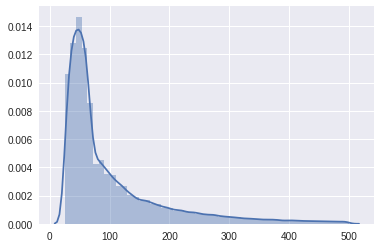

In [10]:
sns.distplot([len(desc) for desc in descs]);

In [11]:
random.sample(descs, 10)

['If the closing for tag is not closed by the time the enclosing DCNL element of the opening for tag is closed, close the for tag DCNL just before the enclosing element.',
 'Add the settings object to the template context.',
 'Must return a method used by binary operator',
 'Test parsing with the HTML5 parser used for conversion',
 'Modifies the model so that it contains n documents of each type. DCNL With MINORITY, n = the number of documents in the minority class. DCNL With MAJORITY, n = the number of documents in the majority class DCNL (generates artificial documents for minority classes).',
 'Returns the currently active CSRF token from the session, DCNL generating a new one if needed.',
 'Get the serialized form of this attribute fetch request. DCNL @returns: The fetch request message parameters DCNL @rtype: {unicode:unicode}',
 'Determine prediction class probabilities.',
 'Testing CVSTool.build_cvsroot with a port',
 'Testing ReviewBoardGateway get_branches implementation']

## Save

In [12]:
%store descs

Stored 'descs' (list)
